### 函数式api
Keras 函数式 API 是定义复杂模型（如多输出模型、有向无环图，或具有共享层的模型）的方法

    利用函数式 API，可以轻易地重用训练好的模型: 可以将任何模型看作是一个层，然后通过传递一个张量来调用它 。注意，在调用模型时，您不仅重用模型的结构，还重用了它的权重

多输入多输出模型

In [35]:
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
fashion_mnist=keras.datasets.fashion_mnist
(train_image,train_label),(test_image,test_label)=keras.datasets.fashion_mnist.load_data()

In [37]:
train_image=train_image/255
test_image=test_image/255

In [38]:
train_image.shape

(60000, 28, 28)

**建立输入**

In [39]:
input=keras.Input(shape=(28,28))

**调用层**

In [40]:
x=keras.layers.Flatten()(input)

In [41]:
x=keras.layers.Dense(32,activation='relu')(x)

In [42]:
x=keras.layers.Dropout(0.5)(x)

In [43]:
x=keras.layers.Dense(64,activation='relu')(x)

In [44]:
output=keras.layers.Dense(10,activation='softmax')(x)

**层建立完成，建立模型**


keras.Model(inputs=[input1,input2],outputs=output)

In [45]:
model=keras.Model(inputs=input,outputs=output)

In [46]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                25120     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_______________________________________________________

In [47]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc']) 

In [48]:
hist=model.fit(train_image,train_label,validation_data=(test_image,test_label),epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8340 - acc: 0.6868 - val_loss: 0.5372 - val_acc: 0.8180
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6299 - acc: 0.7630 - val_loss: 0.5791 - val_acc: 0.7717
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5954 - acc: 0.7786 - val_loss: 0.5100 - val_acc: 0.8204
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5690 - acc: 0.7887 - val_loss: 0.5491 - val_acc: 0.7879
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5579 - acc: 0.7963 - val_loss: 0.5567 - val_acc: 0.7829


多输入

x = keras.layers.concatenate([lstm_out, auxiliary_input])

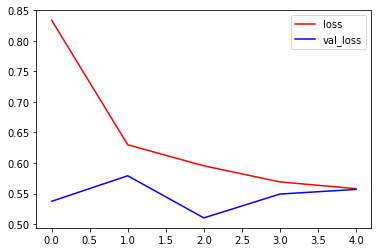

In [49]:
plt.plot(hist.epoch,hist.history.get('loss'),'r',label='loss')
plt.plot(hist.epoch,hist.history.get('val_loss'),'b',label='val_loss')
plt.legend(loc='best')